<a href="https://colab.research.google.com/github/tomormerod/GEOG3003M/blob/main/GEOG5003M_Report_Assignment_200919142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The relationship between the number of affordable homes and residential sales per Yorkshire and Humber district

#1.0 Package installation
Per coding conventions, all packages and modules therein required for the code to run were downloaded first. Packages not built into Python were installed via the 'pip install' command. One module was imported from Matplotlib.

In [ ]:
# Install neccessary packages
!pip install mapclassify
!pip install contextily
!pip install geoplot
!pip install git+https://github.com/pmdscully/geo_northarrow.git
!pip install -U notebook-as-pdf

# Import neccessary packages
import pyproj
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs

import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Import neccessary modules.

from matplotlib.colors import ListedColormap

# Set seaborn plotting theme to white
sns.set_theme(style="white")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 97.3 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-ro609bw3
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-ro609bw3
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14725 sha256=bbefbdf84aebc38d18b6cbd2d5c9ec225c024a899221c0c6ca35ea87e70e7880
  Stored in directory: /tmp/pip-ephem-wheel-cache-436o051_/wheels/6a/22/96/2e5d1215f457d6b69b44cbaa1a0d3b822bc656dcabcda80095
Suc

#2.0 Non-spatial data preprocessing
## 2.1 Data import
To create this CSV file, the comments, navigation links and overall page header from one sheet of the original XLSX file were removed to make the column headers the first row.

In [ ]:
# Read in and undertake a basic exploration of the Statistical Data Return (SDR) dataset.
sdr = pd.read_csv('https://github.com/tomormerod/GEOG3003M/raw/refs/heads/main/sdr_2024_data.csv')
sdr.head()

,PRP name,PRP registration number,Size of organisation,Local Authority name,LA code,General needs - Self-contained - Owned low cost rental accommodation by Local Authority area,General needs - Bedspace - Owned low cost rental accommodation by Local Authority area,Supported housing - Owned low cost rental accommodation by Local Authority area,Housing for older people - Owned low cost rental accommodation by Local Authority area,Total number of units which fail the DHS by local authority area,...,Total general needs self-contained units vacant,Total sales to registered providers,Sales to tenants - Right to Buy (including Preserved Right to Buy but excluding Voluntary Right to Buy),Sales to tenants - Voluntary Right to Buy,Sales to tenants - Right to Acquire,Sales to tenants - Other sales to tenants,Total sales to tenants,Total sales to other,Total demolitions,Other Losses
0,'Johnnie' Johnson Housing Trust Limited,L1231,Large,Sheffield,E08000019,64,0,1,97,0,...,2,[x],[x],[x],[x],[x],[x],[x],[x],[x]
1,'Johnnie' Johnson Housing Trust Limited,L1231,Large,Tameside,E08000008,65,0,0,198,0,...,1,[x],[x],[x],[x],[x],[x],[x],[x],[x]
2,'Johnnie' Johnson Housing Trust Limited,L1231,Large,Stockport,E08000007,200,0,25,360,3,...,1,[x],[x],[x],[x],[x],[x],[x],[x],[x]
3,'Johnnie' Johnson Housing Trust Limited,L1231,Large,Bradford,E08000032,0,0,0,42,0,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
4,'Johnnie' Johnson Housing Trust Limited,L1231,Large,Rotherham,E08000018,106,0,3,208,0,...,3,[x],[x],[x],[x],[x],[x],[x],[x],[x]


In [ ]:
# View the column names. Note that these are not acceptable for further use currently and need cleaning.
sdr.columns

Index(['PRP name', 'PRP registration number', 'Size of organisation',
       'Local Authority name', 'LA code',
       'General needs - Self-contained - Owned low cost rental accommodation by Local Authority area',
       'General needs - Bedspace - Owned low cost rental accommodation by Local Authority area',
       'Supported housing - Owned low cost rental accommodation by Local Authority area',
       'Housing for older people - Owned low cost rental accommodation by Local Authority area',
       'Total number of units which fail the DHS by local authority area',
       'General needs - Self-contained - Managed low cost rental accommodation by Local Authority area',
       'General needs - Bedspace - Managed low cost rental accommodation by Local Authority area',
       'Supported housing - Managed low cost rental accommodation by Local Authority area',
       'Housing for older people - Managed low cost rental accommodation by Local Authority area',
       'Owned - where the purch

## 2.2 Data cleaning
To clean the column names, they were made lowercase and spaces were removed.

In [ ]:
# Replace all spaces with dashes and make all headers lowercase.
sdr.columns = sdr.columns.str.replace(' ', '_')
sdr.columns = sdr.columns.str.lower()
# View the new column names to refer to in later stages.
sdr.columns

Index(['prp_name', 'prp_registration_number', 'size_of_organisation',
       'local_authority_name', 'la_code',
       'general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'housing_for_older_people_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'total_number_of_units_which_fail_the_dhs_by_local_authority_area',
       'general_needs_-_self-contained_-_managed_low_cost_rental_accommodation_by_local_authority_area',
       'general_needs_-_bedspace_-_managed_low_cost_rental_accommodation_by_local_authority_area',
       'supported_housing_-_managed_low_cost_rental_accommodation_by_local_authority_area',
       'housing_for_older_people_-_managed_low_cost_rental_accommodation_by_local_authority_area',
       'owned_-_where_the_purch

The relevant columns for this analysis, i.e. the number of properties owned by housing associations, were selected.

In [ ]:
# Copy and paste from the list above to select the subset of columns which are relevant to this project.
sdr_red = sdr[['local_authority_name', 'la_code', 'general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'housing_for_older_people_-_owned_low_cost_rental_accommodation_by_local_authority_area']]
# Check for missing data and current data types.
sdr_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 6 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   local_authority_name                                                                          10480 non-null  object
 1   la_code                                                                                       10480 non-null  object
 2   general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area  10480 non-null  object
 3   general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area        10480 non-null  object
 4   supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area               10480 non-null  object
 5   housing_for_older_people_-_owned_

The dataset was also filtered for the Yorkshire & Humber region.

In [ ]:
# Filter the dataset for the region of interest.
sdr_yorks = sdr_red.loc[sdr_red['local_authority_name'].isin(['York', 'Leeds', 'Wakefield', 'Kirklees', 'Bradford', 'Calderdale', 'Barnsley', 'East Riding of Yorkshire',
'Doncaster', 'Kingston upon Hull, City of', 'North East Lincolnshire', 'North Lincolnshire', 'North Yorkshire', 'Rotherham', 'Sheffield'])]

## 2.3 Data aggregation
The data raw consisted of string literals of the numbers, so to be processed, it was transformed to a numerical format. To transform the null values into a number, their representation was changed from ‘[x]’ to ‘0’.

In [ ]:
# Transform 'no data' points to the string literal '0' and transform all the numerical columns from string to numeric.
sdr_yorks = sdr_yorks.replace('[x]','0')
sdr_yorks[['general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'housing_for_older_people_-_owned_low_cost_rental_accommodation_by_local_authority_area']] = sdr_yorks[['general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area',
       'housing_for_older_people_-_owned_low_cost_rental_accommodation_by_local_authority_area']].apply(pd.to_numeric)
# View the result.
sdr_yorks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 0 to 10460
Data columns (total 6 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   local_authority_name                                                                          606 non-null    object
 1   la_code                                                                                       606 non-null    object
 2   general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area  606 non-null    int64 
 3   general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area        606 non-null    int64 
 4   supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area               606 non-null    int64 
 5   housing_for_older_people_-_owned_low_cos

These numerical columns were then grouped to give the subtotal of each property type for each council.

In [ ]:
# Match the 'local authority name' column header to the 'local authority code' column header.
sdr_yorks = sdr_yorks.rename(columns={'local_authority_name':'la_name'})
# Grouping by both, sum the various types of property owned by each housing association.
sdr_la = sdr_yorks.groupby(['la_name', 'la_code']).agg({'general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area':'sum',
       'general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area':'sum',
       'supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area':'sum',
       'housing_for_older_people_-_owned_low_cost_rental_accommodation_by_local_authority_area':'sum'})
# View the result.
sdr_la

,,general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area,general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area,supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area,housing_for_older_people_-_owned_low_cost_rental_accommodation_by_local_authority_area
la_name,la_code,,,,
Barnsley,E08000016,3178,0,291,672
Bradford,E08000032,27067,0,1551,2906
Calderdale,E08000033,12702,0,492,898
Doncaster,E08000017,3129,3,821,1006
East Riding of Yorkshire,E06000011,3013,0,276,618
"Kingston upon Hull, City of",E06000010,7423,0,907,1261
Kirklees,E08000034,4449,0,473,1269
Leeds,E08000035,13908,8,1578,3040
North East Lincolnshire,E06000012,7950,0,480,1097


The total owned properties across all types for each council was calculated. The columns were renamed for easier recall in a summation formula.

In [ ]:
# Rename the columns for the property types to make them easier to reference.
sdr_la = sdr_la.rename(columns={'general_needs_-_self-contained_-_owned_low_cost_rental_accommodation_by_local_authority_area' : 'gen_sc_owned',
       'general_needs_-_bedspace_-_owned_low_cost_rental_accommodation_by_local_authority_area' : 'gen_bed_owned',
       'supported_housing_-_owned_low_cost_rental_accommodation_by_local_authority_area' : 'sup_owned',
       'housing_for_older_people_-_owned_low_cost_rental_accommodation_by_local_authority_area' : 'elderly_owned'})
# Use these new column names to create a 'total owned' column for each local authority.
sdr_la['total_owned']=sdr_la['gen_sc_owned']+sdr_la['gen_bed_owned']+sdr_la['sup_owned']+sdr_la['elderly_owned']
# View the result.
sdr_la

,,gen_sc_owned,gen_bed_owned,sup_owned,elderly_owned,total_owned
la_name,la_code,,,,,
Barnsley,E08000016,3178,0,291,672,4141
Bradford,E08000032,27067,0,1551,2906,31524
Calderdale,E08000033,12702,0,492,898,14092
Doncaster,E08000017,3129,3,821,1006,4959
East Riding of Yorkshire,E06000011,3013,0,276,618,3907
"Kingston upon Hull, City of",E06000010,7423,0,907,1261,9591
Kirklees,E08000034,4449,0,473,1269,6191
Leeds,E08000035,13908,8,1578,3040,18534
North East Lincolnshire,E06000012,7950,0,480,1097,9527


## 2.4 Further datasets
To explore the relationships between the affordable home ownership and other data, additional datasets were added to and merged with the existing dataset.

### 2.4.1 Residential sales
The original comments and page header from the original CSV file were removed - to make the column headers the first row.
The data was already aggregated to the council level, so it was merged with the existing dataset on the council code. The columns were renamed for clarity.  


In [ ]:
# Read in the 'Residential Sales' dataset.
resi = pd.read_csv('https://github.com/tomormerod/GEOG3003M/raw/refs/heads/main/residential_sales.csv')

# Merge with the SDR dataset to bring the data for each local authority together.
sdr_sales = sdr_la.merge(resi, left_on='la_code', right_on='mnemonic', how='right')
# Set the index to the local authority name.
sdr_sales.set_index('local authority: district / unitary (as of April 2023)')
# Rename the columns from the 'residential sales' part of the dataset to simpler headers.
sdr_sales = sdr_sales.rename(columns = {'local authority: district / unitary (as of April 2023)':'la_name', 'mnemonic':'la_code', 'Sep-24': 'residential_sales'})

### 2.4.2 Council GDP
The statistical region of each council is given. The Yorkshire & Humber ITL1 region was used to filter the data, so they could be merged. Columns were renamed for clarity and consistency.

The merged, cleaned dataset was then reordered according to the size of the GDP, as required for visualisation.


In [ ]:
# Read in the 'GDP LA' dataset.
gdp_la = pd.read_csv('https://github.com/tomormerod/GEOG3003M/raw/refs/heads/main/gdp_la.csv')
# Filter for the Yorkshire & Humber region (the area of interest). Reset the index and then drop the new index column for simplicity.
gdp_la = gdp_la.loc[gdp_la['ITL1 Region']=='Yorkshire and The Humber'].reset_index()
gdp_la = gdp_la.drop(columns = 'index')

# Extract the important columns from the dataset.
gdp_la = gdp_la[['LA code', 'LA name', '2023']]
# Rename the local authority identifier columns to the same as the other datasets and the '2023' column to 'GDP 2023' for clarity.
gdp_la = gdp_la.rename(columns = {'LA code':'la_code', 'LA name':'la_name', '2023':'gdp_2023'})

# Merge the dataset gathered so far.
sdr_sales_gdp = gdp_la.merge(sdr_sales, left_on='la_code', right_on='la_code', how='right')
# There will be two 'la_name' columns, so rename the first one to just 'la_name' and drop the other. Sort values according to GDP, reset the index and drop the new index column.
sdr_sales_gdp = sdr_sales_gdp.rename(columns = {'la_name_x':'la_name'}).sort_values('gdp_2023').reset_index().drop(columns=['index','la_name_y'])

As with the SDR dataset, the columns were transformed from string literals into numerical data. All the commas were first removed as these cannot be interpreted during the transformation. Once converted, the column was further transformed into float data for plotting.  

In [ ]:
# To transform the GDP column from string into numbers, first remove all commas.
sdr_sales_gdp['gdp_2023']= [i.replace(',','') for i in sdr_sales_gdp['gdp_2023']]
# Transform the GDP column into numbers.
sdr_sales_gdp['gdp_2023'] = sdr_sales_gdp['gdp_2023'].apply(pd.to_numeric)
# The column used to define size order will need float data, so create a new column by transforming the GDP, now in integer form, into float and rename for clarity.
sdr_sales_gdp['size_order'] = sdr_sales_gdp['gdp_2023'].astype(float)

## 3.0 Non-spatial data visualisation
This visualisation examined the relationship between the number of affordable homes owned by housing associations and the number of sales in different councils.

The third variable displayed is GDP. Varying circles by size is the most effective way of expressing this. Area is not a very effective visual channel overall (Munzner, 2014). However, of the visual channels considered more effective by Munzner's ranking, position is already accounted for, and angle is not applicable, so area was the most effective visual channel available.

A regression line illustrates the relationship further. To simply the process of showing both variably sized points and a regression line, two subplots were made.

For the scatterplot, the maximum size of 1500 was the largest circle that would not breach the subplot’s boundaries. The ratio of 175:1500 is the same as between the size of the smallest and largest economies.

For the regression plot, the councils were all labelled but to avoid overcrowding in the densest area of the graph, four were selected to be placed differently relative to their point. Several labels were also right-justified rather than left-justified to stay within the subplot boundaries. ‘East Riding of Yorkshire’ was shortened for labelling.

The blue of the circles and the red of the line were chosen for their colourblind accessibility using the tool on this webpage: https://davidmathlogic.com/colorblind/#%23648FFF-%23785EF0-%23DC267F-%23FE6100-%23FFB000, which simulates colour-blindness.


Text(4000, 7800, '"East Yorkshire" full name : \nEast Riding of Yorkshire')

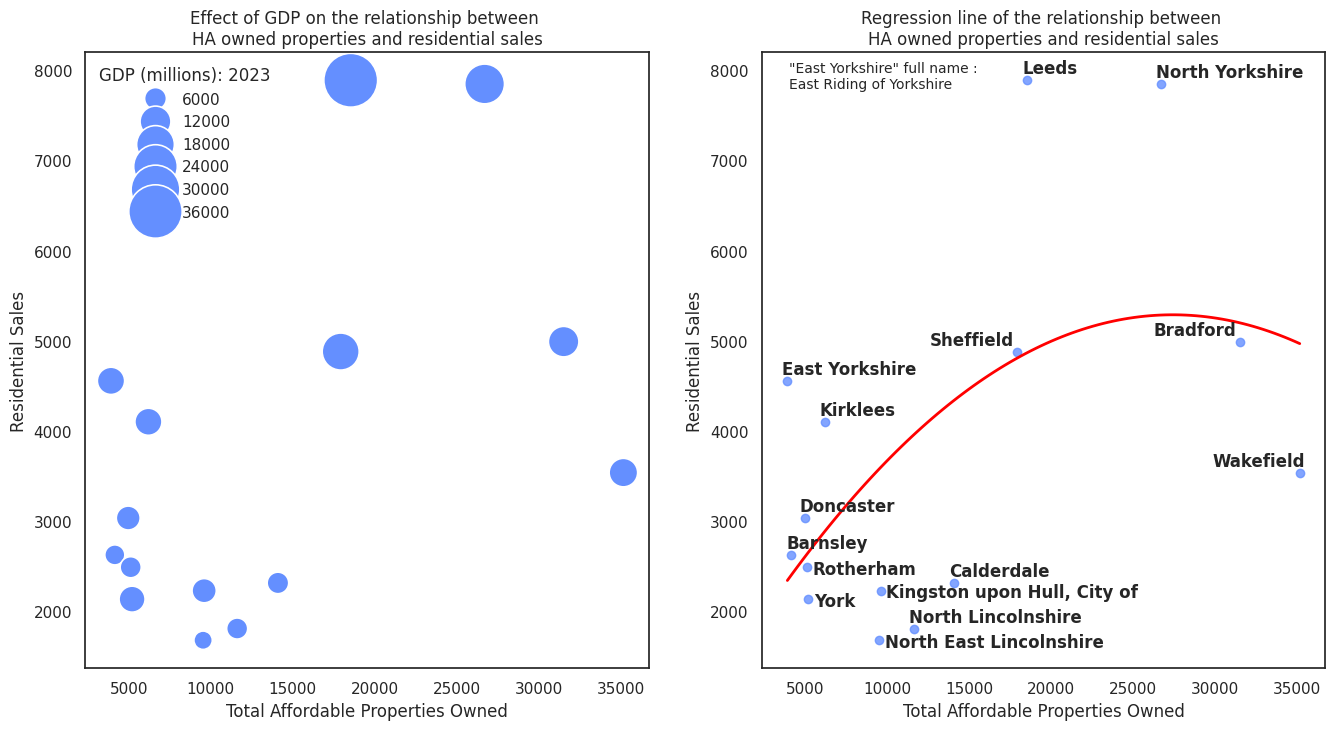

In [ ]:
# This is a minor alteration for the purposes of plotting this long name on the graph.
sdr_sales_gdp = sdr_sales_gdp.replace('East Riding of Yorkshire','East Yorkshire')

# Define the figure as having two subplots.
fig, ax = plt.subplots(1,2, figsize=(16,8), sharex=False, sharey=False)

# For subplot 1, first define the data (Total owned vs residential sales), specifying the size of the circles will be determined by the 'size order' column.
sns.scatterplot(ax=ax[0], x='total_owned', y='residential_sales', data=sdr_sales_gdp, size = 'size_order', sizes=(175,1500), legend = 'brief', color = '#648FFF')

# Get and create a title for a legend for the first subplot.
leg = ax[0].get_legend()
leg.set_title('GDP (millions): 2023')
leg.get_frame().set_alpha(0)

# Set axis and chart titles for the first subplot.
ax[0].set(xlabel="Total Affordable Properties Owned",
       ylabel="Residential Sales",
      title ='Effect of GDP on the relationship between \nHA owned properties and residential sales');

# For the second subplot, first define the data (Total owned vs residential sales), specifying the regression line will be order 2 with no confidence intervals.
sns.regplot(ax=ax[1], x='total_owned', y='residential_sales', data=sdr_sales_gdp, order=2, marker='o', color = '#648FFF', ci=None, line_kws={'color':'Red','linewidth':2})

# Set axis and chart titles for the second subplot.
ax[1].set(xlabel="Total Affordable Properties Owned",
       ylabel="Residential Sales",
      title ='Regression line of the relationship between \nHA owned properties and residential sales');

# These label groups are derived from trial and error. The busiest part of the graph is divided into two groups, with different locations relative to their points to avoid overcrowding.
for line in range(0,sdr_sales_gdp.shape[0]):

  if sdr_sales_gdp['la_name'][line] in ['Kingston upon Hull, City of','North East Lincolnshire','Rotherham','York']:
     plt.text(
          sdr_sales_gdp["total_owned"][line]+350,
          sdr_sales_gdp["residential_sales"][line]-75,
          sdr_sales_gdp["la_name"][line],
          ha='left',
          weight='bold'
     )

# These three local authorities are also in a unique position on the graph which warrants a different position to the rest of the points.
  elif sdr_sales_gdp['la_name'][line] in ['Wakefield','Bradford','Sheffield']:
    plt.text(
          sdr_sales_gdp["total_owned"][line]-5300,
          sdr_sales_gdp["residential_sales"][line]+75,
          sdr_sales_gdp["la_name"][line],
          ha='left',
          weight='bold'
    )

  else:
     plt.text(
          sdr_sales_gdp["total_owned"][line]-300,
          sdr_sales_gdp["residential_sales"][line]+75,
          sdr_sales_gdp["la_name"][line],
          ha='left',
          weight='bold'
     )

# Add a brief note explaining that East Yorkshire is officially 'East Riding of Yorkshire'.
plt.text(
      4000,
      7800,
      '"East Yorkshire" full name : \nEast Riding of Yorkshire',
      fontsize = 10)

# 4.0 Spatial data preprocessing
## 4.1 Data import
The code block below was used once to create the shapefile before it was uploaded to GitHub.

The original file contained the boundaries of all council districts in the UK. It was filtered for the Yorkshire and Humber region.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#yorks_la = gpd.read_file('/content/drive/MyDrive/la23_boundaries.geojson')
#yorks_la = yorks_la.loc[yorks_la['LAD23NM'].isin(['York', 'Leeds', 'Wakefield', 'Kirklees', 'Bradford', 'Calderdale', 'Barnsley', 'East Riding of Yorkshire',
#'Doncaster', 'Kingston upon Hull, City of', 'North East Lincolnshire', 'North Lincolnshire', 'North Yorkshire', 'Rotherham', 'Sheffield'])]
#yorks_la.to_file('Yorks.geojson')

## 4.2 Custom-made colourmap definition
The same tool as before was used to create a sequence of colours which progressed logically for ordinary sighted viewers and were distinguishable by various colourblind viewers. A colourmap from lime green to reddish pink was chosen.

In [ ]:
# This is a list of colours defined by HEX value, specially chosen to be accessible to colourblind viewers.
my_cmap=ListedColormap(['#9BE494', '#648FFF', '#7D145E', '#9E0000', '#FF0C6C'])

## 4.3 Data categorisation
It was not practical to create a continuous, colourblind accessible colour ramp. To account for the limited number of the colours, the continuous data was transformed into categories based on their quintile.

Two new dataframes, one for each variable, were created with only the councils’ names and their quintile ranking for residential sales and total owned homes.


In [ ]:
# Show the local authorities reordered by their 'total owned' value.
sdr_sales_gdp[['total_owned','la_name']].sort_values('total_owned',ascending=False)

,total_owned,la_name
0,35168,Wakefield
1,31524,Bradford
3,26702,North Yorkshire
4,18534,Leeds
2,17921,Sheffield
9,14092,Calderdale
7,11605,North Lincolnshire
11,9591,"Kingston upon Hull, City of"
5,9527,North East Lincolnshire
13,6191,Kirklees


In [ ]:
# Create a new dataframe with only the local authority names and their 'total owned' ranking.

# Reorder the data as shown above but reordering the entire dataset and creating a new one.
owned_sorted = sdr_sales_gdp.sort_values('total_owned', ascending=False)
#The local authority name column of that dataset, now in the correct order to easily categorise them, becomes a new independent list.
la_name = owned_sorted['la_name']
# The second list consists of 15 values - one for each local authority - stating which quintile it ranks in. With five colours to accomodate the entire dataset, they are divided into five groups of three.
owned_order = ['1. most owned','1. most owned','1. most owned','2. many owned','2. many owned','2. many owned','3. average owned','3. average owned','3. average owned','4. few owned','4. few owned','4. few owned','5. least owned','5. least owned','5. least owned']
# Create a new dataframe with these columns. Rename the 'name column' to the usual for ease of merging in later blocks.
df1 = pd.DataFrame({'Local Authority': la_name, 'Owned ranking': owned_order})

In [ ]:
# Repeat the process for the second variable. Begin by, once again, showing the local authorites reordered but now by their 'residential sales' value.
sdr_sales_gdp[['residential_sales','la_name']].sort_values('residential_sales',ascending=False)

,residential_sales,la_name
4,7891,Leeds
3,7850,North Yorkshire
1,4991,Bradford
2,4881,Sheffield
14,4556,East Yorkshire
13,4102,Kirklees
0,3538,Wakefield
10,3034,Doncaster
6,2625,Barnsley
8,2488,Rotherham


In [ ]:
# Repeat the database formation process as before, but with the 'residential sales' rankings.

# Reorder.
resi_sorted = sdr_sales_gdp.sort_values('residential_sales', ascending=False)
# Reordered local authority name list.
la_name_2 = resi_sorted['la_name']
# Residential sales ranking list in the same order.
resi_order = ['1. most sales', '1. most sales', '1. most sales', '2. many sales','2. many sales', '2. many sales','3. average sales','3. average sales','3. average sales','4. few sales','4. few sales','4. few sales','5. least sales','5. least sales','5. least sales']
# Create a new dataframe and rename columns.
df2 = pd.DataFrame({'Local Authority': la_name_2, 'Sales ranking': resi_order})

## 4.4 Joining with non-spatial data

The reduced shapefile was read in, merged with the newly created dataframe on the council’s name, and tidied by dropping repetitive columns.


In [ ]:
# Merge the two dataframes into one.
df = df1.merge(df2, left_on='Local Authority', right_on = 'Local Authority', how = 'inner')

# Read in the local authority shapefile.
yorks_la = gpd.read_file('https://github.com/tomormerod/GEOG3003M/raw/refs/heads/main/Yorks.geojson')
# Merge with the dataframe created above to add geometry data to the rankings.
sdr_shp = yorks_la.merge(df, left_on='LAD23NM', right_on='Local Authority', how = 'left')
# Drop the unneccessary 'Local Authority' column.
sdr_shp = sdr_shp.drop(columns='Local Authority')
# View the result.
sdr_shp

,FID,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Owned ranking,Sales ranking
0,10,E06000010,"Kingston upon Hull, City of",,511892,431651,-0.30385,53.76921,0481e503-ab1f-422b-a61a-5f8294b5742b,"MULTIPOLYGON (((-0.24433 53.73718, -0.24434 53...",3. average owned,4. few sales
1,11,E06000011,East Riding of Yorkshire,,488056,443597,-0.66195,53.88112,f284025d-9172-4f55-9a5a-74b9b7d9afe1,"MULTIPOLYGON (((-0.72958 53.70429, -0.72937 53...",NaN,NaN
2,12,E06000012,North East Lincolnshire,,523465,404564,-0.13911,53.52327,52232b22-0def-4bee-a404-efae85bb7a82,"POLYGON ((-0.18854 53.63101, -0.18841 53.6309,...",3. average owned,5. least sales
3,13,E06000013,North Lincolnshire,,497800,410993,-0.52407,53.58643,d78c5031-6734-405c-9122-56d0bb43a824,"MULTIPOLYGON (((-0.68983 53.67744, -0.68969 53...",3. average owned,5. least sales
4,14,E06000014,York,,460863,452590,-1.07376,53.96583,4ee27764-1d8b-48b5-a62c-92b159fff580,"POLYGON ((-1.02065 54.05099, -1.0199 54.05082,...",4. few owned,5. least sales
5,62,E06000065,North Yorkshire,,429508,466514,-1.55033,54.09370,12097e42-d342-4f3c-9f2b-e4b9b725b24a,"MULTIPOLYGON (((-1.00647 53.88871, -1.00623 53...",1. most owned,1. most sales
6,243,E08000016,Barnsley,,429979,403327,-1.54925,53.52577,4b6616e4-6ac8-4056-8350-d81b0c48ae58,"POLYGON ((-1.44703 53.61239, -1.4469 53.61236,...",5. least owned,3. average sales
7,244,E08000017,Doncaster,,459167,403733,-1.10894,53.52695,f1790a01-c831-47ae-b6d2-412165c17e6c,"POLYGON ((-0.99061 53.65857, -0.99072 53.65821...",5. least owned,3. average sales
8,245,E08000018,Rotherham,,447542,388980,-1.28651,53.39553,4d2da784-b6c5-4fdf-89fa-d61f0ff9a21a,"POLYGON ((-1.36785 53.51508, -1.36691 53.51482...",4. few owned,4. few sales
9,246,E08000019,Sheffield,,430511,389736,-1.54254,53.40358,5e64e5c7-6608-4a55-b5e8-c39b422121e6,"MULTIPOLYGON (((-1.80146 53.48099, -1.80146 53...",2. many owned,2. many sales


# 5.0 Spatial data visualisation

The data is represented spatially as choropleth maps. Each colour represents an equal frequency of observations in different sized bins. Green represents high sales and many affordable homes, and pink low sales and few affordable homes.
The geodataframe was transformed to Web Mercator projection to add a basemap, and the alpha was set to 0.5 to view it. Zoom level 9 highlighted key places without overcrowding the figure. A linewidth of 1 made the council boundaries clear.

The target audience of these figures are housing developer stakeholders, so the map was designed with an assumption of prior knowledge about the economic data and geography, such that these can be read intuitively.


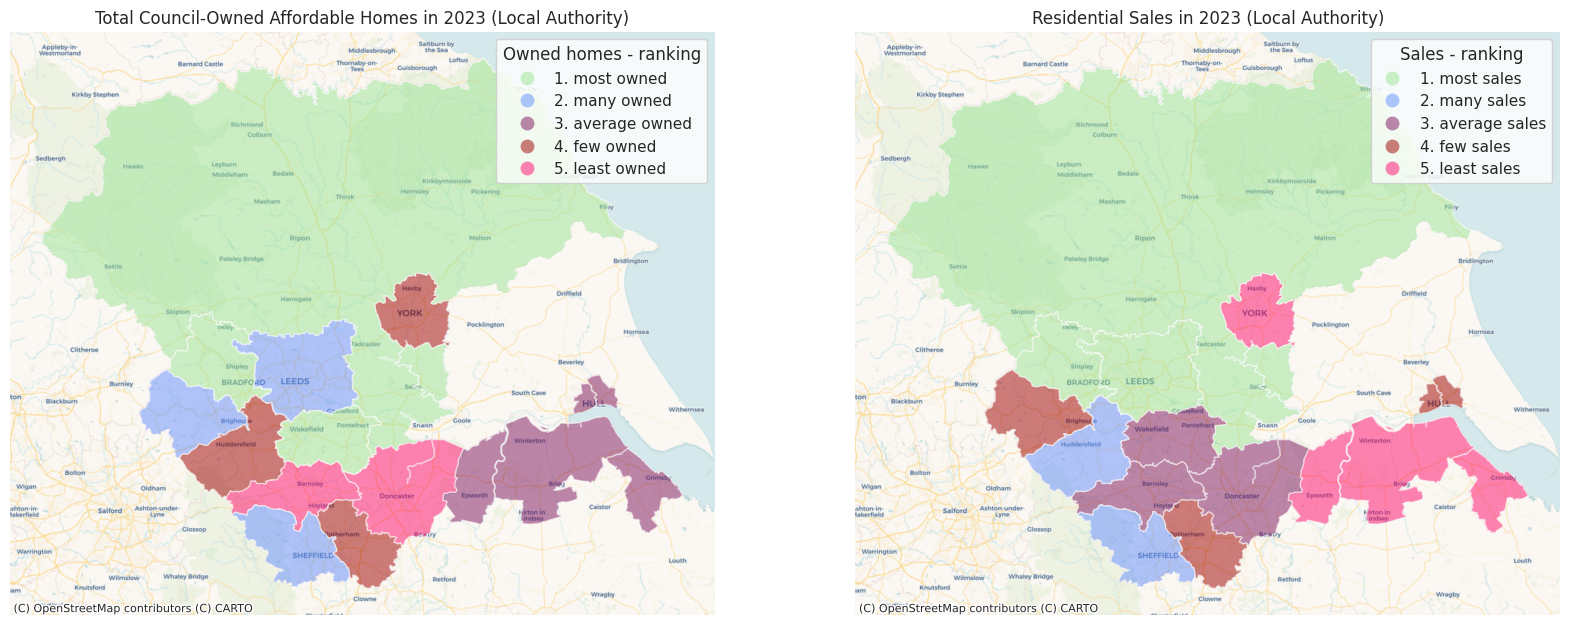

In [ ]:
# To allow the data to be plotted against a basemap, transform to Web Mercator projection (EPSG 3857).
sdr_shp_WM = sdr_shp.to_crs(epsg=3857)

# Define the figure as having two subplots.
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Specify the columns for each subplot, the 'owned ranking' for the first and the 'sales ranking' for the second, coloured by the custom-made colourmap.
sdr_shp_WM.plot(ax=ax[0], column='Owned ranking', linewidth = 1, alpha = 0.5, legend = True, cmap = my_cmap)
sdr_shp_WM.plot(ax=ax[1], column='Sales ranking', linewidth = 1, alpha = 0.5, legend = True, cmap = my_cmap)

# Get and set titles for the legends for both subplots.
leg1=ax[0].get_legend()
leg1.set_title('Owned homes - ranking')
leg2=ax[1].get_legend()
leg2.set_title('Sales - ranking')

# Remove the axes from both subplots.
ax[0].set_axis_off()
ax[1].set_axis_off()

# Set titles for what each subplot is showing.
ax[0].set_title('Total Council-Owned Affordable Homes in 2023 (Local Authority)')
ax[1].set_title('Residential Sales in 2023 (Local Authority)')

# Define the basemap for the two subplots, specifying for its CRS to be set to that of the geodataframe.
ctx.add_basemap(ax[0],source=ctx.providers.CartoDB.Voyager, zoom=9, crs=sdr_shp_WM.crs)
ctx.add_basemap(ax[1],source=ctx.providers.CartoDB.Voyager, zoom=9, crs=sdr_shp_WM.crs)

# 6.0 Interpretation
There is a parabolic relationship between affordable housing and residential sales. Councils with both many and few affordable homes had low sales, while those with the highest sales had only a modest number. In historic industrialised areas (e.g. Leeds), it was necessary to attract many workers to live there, and higher wages combine with a large buyers’ market. In smaller, wealthy, fast-growing economies (e.g. York, which also benefits from preserving its antiquity), have not needed many affordable homes. This raises prices and reduces affordability and sales. In poorer areas (e.g. Bradford), there is a need for affordable housing, but it is less profitable for housing associations. There is a taboo around new residents moving to previously impoverished city centres, particularly with wealthier suburbs. However, it is improving the living conditions for these areas’ existing residents, with a large supply of affordable homes and a local need for them, that the public benefit can be most.


# 7.0 References

Jones Lang LaSalle IP, Inc. 2024. JLL New Housing Targets Analysis – Targets by numbers - August 2024. Available at: https://residential.jll.co.uk/insights/research/jll-new-housing-targets-analysis-targets-by-numbers-august-2024 . Accessed 04/07/2025.

Ministry of Housing, Communities and Local Government. 2025. Live tables on dwelling stock (Including vacants). Available at: https://www.gov.uk/government/statistical-data-sets/live-tables-on-dwelling-stock-including-vacants . Accessed 04/07/2025.

Munzner, T. 2014. Visualization Analysis and Design. AK Peters Visualization Series. Boca Raton, FL: CRC Press.
Office for National Statistics. 2024a. Housing Affordability in England and Wales. Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/bulletins/housingaffordabilityinenglandandwales/2024/relateddata . Accessed 26/06/2025.

Office for National Statistics. 2025. Regional gross domestic product: local authorities. Available at: https://www.ons.gov.uk/economy/grossdomesticproductgdp/datasets/regionalgrossdomesticproductlocalauthorities . Accessed 26/06/2025.

Office for National Statistics. 2024b. Local Authority Districts (December 2023) Boundaries UK BFC. Available at: https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-december-2023-boundaries-uk-bfc-2/about . Accessed 27/6/2025.

Regulator of Social Housing. 2024. Private registered provider social housing stock and rents in England 2023 to 2024. Available at: https://www.gov.uk/government/statistics/private-registered-provider-social-housing-stock-and-rents-in-england-2023-to-2024 . Accessed 26/06/2025.
